In [3]:
def insta_searching(word):
    url='https://www.instagram.com/explore/tags/'+word
    return url

In [4]:
from selenium import webdriver

In [3]:
from selenium import webdriver
driver=webdriver.Chrome('C:/Users/kaitnam/AppData/Local/Programs/Python/Python38-32/chromedriver.exe')

url='https://www.naver.com'
driver.get(url)
html=driver.page_source

In [5]:
def insta_searching(word):
    url='https://www.instagram.com/explore/tags/'+word
    return url

In [6]:
from selenium import webdriver
driver=webdriver.Chrome('C:/Users/kaitnam/AppData/Local/Programs/Python/Python38-32/chromedriver.exe')

word='비오는날영화'
url=insta_searching(word)
driver.get(url)

In [7]:
import time

def select_first(driver):
    first=driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)
    
select_first(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._9AhH0"}
  (Session info: chrome=91.0.4472.114)


In [13]:
import re
from bs4 import BeautifulSoup
import unicodedata   # 추가, 2020.08.20

def get_content(driver):
    # ① 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # ② 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)   # 신규 추가. 2020.08.20
    except:
        content = ' '
    # ③ 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)  
    # ④ 작성일자 정보 가져오기
    #date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # ⑤ 좋아요 수 가져오기
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # ⑥ 위치정보 가져오기
    #try: 
        #place = soup.select('div.M30cS')[0].text
        #place = unicodedata.normalize('NFC', place)      # 신규 추가. 2020.08.20
    #except:
        #place = ''
    # ⑦ 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['얼큰한 국물과 다양한 해물을즐길수있는 공항근처 해물탕맛집<연북로해물탕>⠀해물탕맛집 클라스 답게팔로우 하면 전복물회 서비스를주는 맛집!@yeonbukro.haemul⠀상차림 스페셜을 추천!진짜 입이 떡 벌어지는 👀상차림을 받을수 있다!⠀1차부터 돌솥밥과 함께제주옥돔구이 그리고 귀한장뇌삼한뿌리씩 올라간!👍모듬장 한접시,생전복회까지진수성찬 플렉스~😍⠀벌써 배가부르다고?ㄴㄴ해물탕 비주얼보자마자진짜 언제 배가 불렀냐는듯수저들고 바로전투태세! 😆😆⠀제주도 해물들 여기 다 집합한듯!크기로 압도하고!살아있는 문어를 통째로넣어주니..싱싱함을 말 할 것도 없음!⠀크~샤따내려!오늘 한라산소주각이다!⠀국물러버, 해물탕 좋아하는 사람들은무조건 좋아할듯!⠀어른들 모시고 가기에도 딱!강!력!추!천!👍👍⠀연북로해물탕⠀＊제주시 연북로 221＊매일 08:00 ~ 22:00＊064-742-0110#제주공항근처맛집#제주도민맛집#제주맛집 #제주도맛집#제주해물탕 #제주도해물탕#제주시해물탕 #제주해물탕맛집#제주도해물탕맛집 #제주시해물탕맛집#연북로해물탕',
 '2020-08-29',
 0,
 '',
 ['#제주공항근처맛집',
  '#제주도민맛집',
  '#제주맛집',
  '#제주도맛집',
  '#제주해물탕',
  '#제주도해물탕',
  '#제주시해물탕',
  '#제주해물탕맛집',
  '#제주도해물탕맛집',
  '#제주시해물탕맛집',
  '#연북로해물탕']]

In [14]:
def move_next(driver):
    right=driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

In [15]:
word = "제주도맛집"    #검색어
url = insta_searching(word)

# ③ 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ④ 첫 번째 게시글 열기
select_first(driver)

# ⑤ 비어있는 변수(results)만들기
results = [ ]


# ⑥→⑦→⑧ 여러 게시물 수집하기
target = 20      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

[['얼큰한 국물과 다양한 해물을즐길수있는 공항근처 해물탕맛집<연북로해물탕>⠀해물탕맛집 클라스 답게팔로우 하면 전복물회 서비스를주는 맛집!@yeonbukro.haemul⠀상차림 스페셜을 추천!진짜 입이 떡 벌어지는 👀상차림을 받을수 있다!⠀1차부터 돌솥밥과 함께제주옥돔구이 그리고 귀한장뇌삼한뿌리씩 올라간!👍모듬장 한접시,생전복회까지진수성찬 플렉스~😍⠀벌써 배가부르다고?ㄴㄴ해물탕 비주얼보자마자진짜 언제 배가 불렀냐는듯수저들고 바로전투태세! 😆😆⠀제주도 해물들 여기 다 집합한듯!크기로 압도하고!살아있는 문어를 통째로넣어주니..싱싱함을 말 할 것도 없음!⠀크~샤따내려!오늘 한라산소주각이다!⠀국물러버, 해물탕 좋아하는 사람들은무조건 좋아할듯!⠀어른들 모시고 가기에도 딱!강!력!추!천!👍👍⠀연북로해물탕⠀＊제주시 연북로 221＊매일 08:00 ~ 22:00＊064-742-0110#제주공항근처맛집#제주도민맛집#제주맛집 #제주도맛집#제주해물탕 #제주도해물탕#제주시해물탕 #제주해물탕맛집#제주도해물탕맛집 #제주시해물탕맛집#연북로해물탕', '2020-08-29', 0, '', ['#제주공항근처맛집', '#제주도민맛집', '#제주맛집', '#제주도맛집', '#제주해물탕', '#제주도해물탕', '#제주시해물탕', '#제주해물탕맛집', '#제주도해물탕맛집', '#제주시해물탕맛집', '#연북로해물탕']], ['#숙성도 #회식태풍오는날에도줄 서있던곳.고기맛이쩡 ...#제주숙성도 #제주고깃집 #제주도고깃집 #숙성도본점 #제주도맛집 #제주맛집 #제주맛집추천 #제주도맛집추천 #제주시맛집 #제주흑돼지맛집 #제주흑돼지', '2020-08-29', '1,223', '', ['#숙성도', '#회식태풍오는날에도줄', '#제주숙성도', '#제주고깃집', '#제주도고깃집', '#숙성도본점', '#제주도맛집', '#제주맛집', '#제주맛집추천', '#제주도맛집추천', '#제주시맛집', '#제주흑돼지맛집', '#제주흑돼지']]]


In [16]:
import pandas as pd

results_df=pd.DataFrame(results)
results_df.columns=['content','data','like','place','tags']
results_df.to_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/500JejumatJip-1.xlsx')

In [17]:
jeju_insta_df = pd.DataFrame( [ ] )

folder = 'C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/'
f_list = ['3_1_crawling_jejudoMatJip.xlsx', '3_1_crawling_jejudoGwanGwang.xlsx', '3_1_crawling_jejuMatJip.xlsx', '3_1_crawling_jejuYeoHang.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns =['content','data','like','place','tags']

In [18]:
jeju_insta_df.drop_duplicates(subset = [ "content"] , inplace = True)
jeju_insta_df.to_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_1_crawling_raw.xlsx', index = False)

In [19]:
import pandas as pd
raw_total=pd.read_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1    ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2    ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
Name: tags, dtype: object

In [20]:
tags_total=[]

for tags in raw_total['tags']:
    tags_list=tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)


In [26]:
from collections import Counter
tag_counts=Counter(tags_total)

In [27]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [29]:
STOPWORDS=['#일상', '선팔', '제주반영구', '제주눈썹문신', '서귀포눈썹문신', '눈썹문신', '반영구', '제주속눈썹']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected=Counter(tag_total_selected)
tag_counts_selected.most_common(10)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835)]

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name="malgun gothic"
elif sys.platform =="darwin":
    font_name = "AppleGothic"
    
rc('font', family=font_name)

In [32]:
tag_counts_df=pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns=['tags', 'counts']

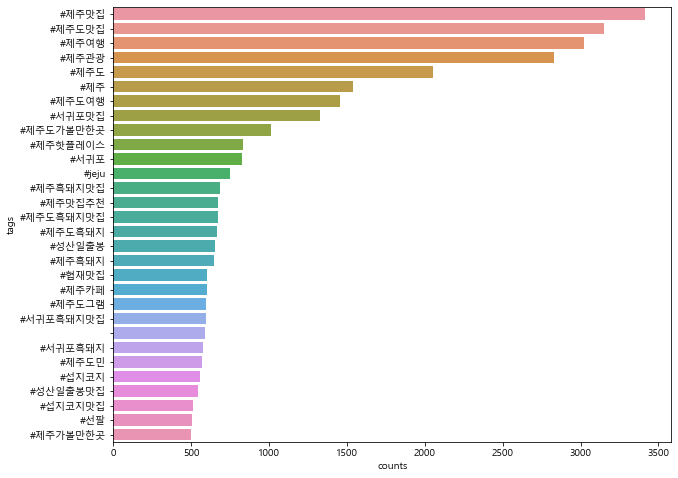

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

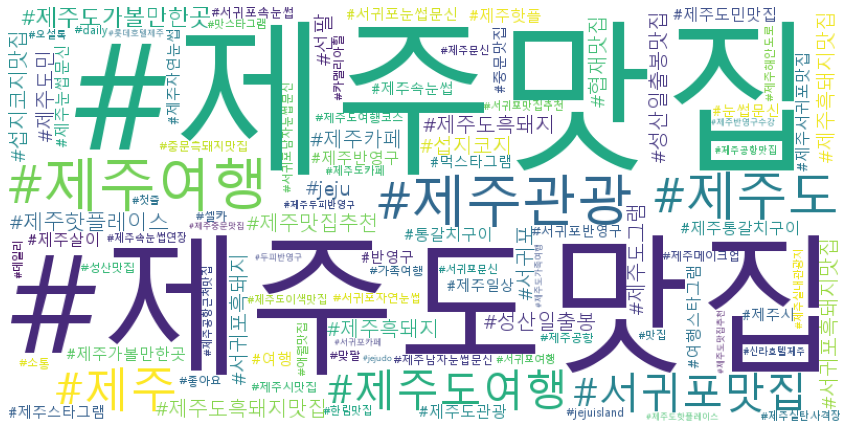

In [45]:
wordcloud=WordCloud(font_path=font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling=0.3,
                    width=800,
                    height=400
                ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_2_tag-wordcloud.png')

In [12]:
import pandas as pd
raw_total=pd.read_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_1_crawling_raw.xlsx')
raw_total.head()

,content,data,like,place,tags
0,제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...,2019-01-01,705,NaN,"['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛..."
1,﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...,2019-01-01,384,NaN,"['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo..."
2,.대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...,2019-01-01,595,NaN,"['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주..."
3,#제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...,2019-01-01,412,NaN,"['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛..."
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]


In [13]:
location_counts=raw_total['place'].value_counts()
location_counts

Jeju                      241
Jeju-do                   172
Jungle Book by Alice      101
Seogwipo                   65
제주도 크리스마스 박물관              59
                         ... 
미영이네식당                      1
양대곱                         1
가배                          1
Shimo-kitazawa Station      1
물꼬기                         1
Name: place, Length: 1027, dtype: int64

In [14]:
location_counts_df=pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [15]:
location_counts_df.to_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_3_location_counts.xlsx')

In [16]:
locations=list(location_counts.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '제주도 애월읍',
 '석부작박물관',
 '알뜨르 비행장',
 '카멜리아 힐',
 '고집돌우럭중문점',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '위미동백나무군락지',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '할로비치',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '새별오름',
 '고래배꼽',
 '용머리해안',
 '용눈이오름',
 '하이엔드 제주',
 '캔디원',
 '사려니숲길',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '한라산',
 '위미2리 동백군락지',
 '휴애리 자연생활공원',
 'Jeju Aewol',
 '제주커피박물관 Baum',
 'Jeju Island 제주특별자치도 济州道',
 '마마뜰',
 '위미동백나무군락',
 '삼무공원',
 '제주해남',
 '서우봉',
 '광치기해변',
 '한라산 (漢拏山, Hallasan)',
 '성이시돌목장',
 '제주 송악산',
 '제주어린왕자게스트하우스',
 '월정리카페콧수염',
 '옹포별장가든',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 '카페한라산',
 '牛岛 Udo Island 우도',
 '아줄레주',
 '카페브리프',
 '에코랜드',
 '곽지해수욕장',
 '산굼부리',
 '비자림',
 'Casa Linda Guesthouse-까사 린다 펜션',
 '노라바',


In [17]:
import requests

searching='합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {
    "Authorization": "KakaoAK ff1895a93f750a7f56af3252877eb3f5"
} 
places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91211392586314',
  'y': '37.54981773755399'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '',
  'place_name': '스타벅스 합정폴리스R

In [18]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
    "Authorization": "KakaoAK ff1895a93f750a7f56af3252877eb3f5"
    } 
    places = requests.get(url, headers = headers).json()['documents']

    place = places[0]
    name = place['place_name']
    x=place['x']
    y=place['y']
    data=[name, x, y, searching]

    return data

In [19]:
data = find_places('제주항공')
data
#이렇게 하면 검색결과로 [카카오 지도상의 명칭, 경도, 위도, 검색어]를 
#리스트 형태로 반환한다.

['제주항공 서울지사', '126.80896554640965', '37.553744090034165', '제주항공']

In [20]:
from tqdm import tqdm_notebook

In [21]:
import time
locations_inform = [ ]
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)       
        locations_inform.append(data) 
        time.sleep(0.5) 
    except:
        pass
locations_inform

<ipython-input-21-e95a8706cd2f>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관',
  '126.32786432205793',
  '33.291569413292265',
  '제주도 크리스마스 박물관'],
 ['제주에인감귤밭', '126.539409663514', '33.2566099433115', '제주에인감귤밭'],
 ['제주도', '126.545875710283', '33.3797769227161', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['카멜리아힐', '126.370009467525', '33.2896344311608', '카멜리아 힐'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['밥깡패', '126.263436208895', '33.410093302084', '밥깡패'],
 ['함덕해수욕장', '126.669238934013', '33.5430615661113', '제주 함덕 서우봉

In [22]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_3_locations.xlsx', index=False)

In [24]:
location_counts_df = pd.read_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_3_location_counts.xlsx', index_col=0)
locations_inform_df=pd.read_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_3_locations.xlsx')

In [26]:
location_data=pd.merge(locations_inform_df, location_counts_df,
                      how='inner', left_on = 'name_official', right_index=True)
                
location_data.head()                       

,name_official,경도,위도,인스타위치명,place
1,서귀포잠수함,126.558616,33.239303,Seogwipo,1
750,서귀포잠수함,126.558616,33.239303,서귀포잠수함,1
3,제주에인감귤밭,126.539410,33.256610,제주에인감귤밭,48
4,제주도,126.545876,33.379777,Jeju Island,4
92,제주도,126.545876,33.379777,제주도,4


In [27]:
location_data.to_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_3_location_inform.xlsx')

In [28]:
location_data = pd.read_excel('C:/Users/kaitnam/Documents/PYTHON/datasalon-master/4_Jeju_Hotplace/files/3_3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     439 non-null    int64  
 1   name_official  439 non-null    object 
 2   경도             439 non-null    float64
 3   위도             439 non-null    float64
 4   인스타위치명         439 non-null    object 
 5   place          439 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 20.7+ KB


In [29]:
! pip install folium